### Import libraries and data

In [9]:
#Below is the list of libraries that were used
import csv
import numpy as np
import pandas as pd 
import math

#Plotting
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#NLTK toolkit
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')

#Machine learning 
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE

#Model validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yoyo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
tweets = pd.read_csv('tweets.csv') #president tweets
#display(tweets.head(40)) 
tweets = tweets.rename(columns={'created_at':'Date'})
tweets['text'] = tweets['text'].apply(str)
tweets['Date'] = pd.to_datetime(tweets['Date'], errors='coerce').dt.date #convert dates from str to regular dates
display(tweets.head(40)) 

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @realDonaldTrump: “Congressman Adam Schiff ...,10-14-2019 01:05:57,19697.0,0,true,1.183549e+18
1,Twitter for iPhone,RT @realDonaldTrump: .....BY THE WAY DON’T CAL...,10-14-2019 01:05:53,18997.0,0,true,1.183549e+18
2,Twitter for iPhone,“Serial killers get more Due Process than the ...,10-14-2019 00:34:01,19867.0,74617,false,1.183541e+18
3,Twitter for iPhone,Somebody please explain to Chris Wallace of Fo...,10-14-2019 00:10:14,26122.0,106477,false,1.183535e+18
4,Twitter for iPhone,The U.S. has the worst of the ISIS prisoners. ...,10-13-2019 23:27:49,16861.0,67151,false,1.183525e+18
5,Twitter for iPhone,.@marklevinshow on @FoxNews is doing a big sho...,10-13-2019 23:09:01,14569.0,50631,false,1.183520e+18
6,Twitter for iPhone,.....BY THE WAY DON’T CALL ME AGAIN I’LL CALL ...,10-13-2019 22:16:39,18997.0,71535,false,1.183507e+18
7,Twitter for iPhone,“Congressman Adam Schiff who when seeing the R...,10-13-2019 22:16:39,19697.0,75536,false,1.183507e+18
8,Twitter for iPhone,CHINA HAS ALREADY BEGUN AGRICULTURAL PURCHASES...,10-13-2019 21:50:14,19846.0,91854,false,1.183500e+18
9,Twitter for iPhone,....I agreed not to increase Tariffs from 25% ...,10-13-2019 21:47:19,11696.0,48671,false,1.183499e+18


,source,text,Date,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @realDonaldTrump: “Congressman Adam Schiff ...,2019-10-14,19697.0,0,true,1.183549e+18
1,Twitter for iPhone,RT @realDonaldTrump: .....BY THE WAY DON’T CAL...,2019-10-14,18997.0,0,true,1.183549e+18
2,Twitter for iPhone,“Serial killers get more Due Process than the ...,2019-10-14,19867.0,74617,false,1.183541e+18
3,Twitter for iPhone,Somebody please explain to Chris Wallace of Fo...,2019-10-14,26122.0,106477,false,1.183535e+18
4,Twitter for iPhone,The U.S. has the worst of the ISIS prisoners. ...,2019-10-13,16861.0,67151,false,1.183525e+18
5,Twitter for iPhone,.@marklevinshow on @FoxNews is doing a big sho...,2019-10-13,14569.0,50631,false,1.183520e+18
6,Twitter for iPhone,.....BY THE WAY DON’T CALL ME AGAIN I’LL CALL ...,2019-10-13,18997.0,71535,false,1.183507e+18
7,Twitter for iPhone,“Congressman Adam Schiff who when seeing the R...,2019-10-13,19697.0,75536,false,1.183507e+18
8,Twitter for iPhone,CHINA HAS ALREADY BEGUN AGRICULTURAL PURCHASES...,2019-10-13,19846.0,91854,false,1.183500e+18
9,Twitter for iPhone,....I agreed not to increase Tariffs from 25% ...,2019-10-13,11696.0,48671,false,1.183499e+18


In [11]:
CBOE = pd.read_csv('^VIX.csv') #SNP500 volatility index
CBOE['Date'] = pd.to_datetime(CBOE['Date']).dt.date #convert dates from str to date
CBOE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,22.580000,24.049999,22.400000,23.170000,23.170000,0
1,2008-01-03,23.110001,23.270000,22.110001,22.490000,22.490000,0
2,2008-01-04,23.500000,24.299999,23.250000,23.940001,23.940001,0
3,2008-01-07,24.620001,24.879999,23.299999,23.790001,23.790001,0
4,2008-01-08,23.270000,25.600000,22.629999,25.430000,25.430000,0


### Sentiment analysis of the tweets

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.tokenize import word_tokenize
#from nltk.corpus import opinion_lexicon

import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yoyo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
#Sentiment analysis of the tweets
sid = SentimentIntensityAnalyzer()
scores = pd.DataFrame()
for text in tweets['text']:
    scores = pd.concat([scores, pd.DataFrame.from_dict(sid.polarity_scores("'''"+text+"'''"), orient='index')], axis=1)

scores = scores.T.reset_index(drop=True)
scores.head()

,neg,neu,pos,compound
0,0.000,0.879,0.121,0.4404
1,0.000,1.000,0.000,0.0000
2,0.186,0.693,0.121,-0.3612
3,0.000,0.891,0.109,0.6696
4,0.177,0.769,0.054,-0.7514


### Concatenate sentiment analysis with initial dataframe and convert dates column to regular dates

In [43]:
tweets = pd.concat([tweets, scores[['neg', 'neu', 'pos', 'compound']]], axis=1) #concatenating sentiment analysis to presidents database
tweets.tail(15)


,source,text,Date,retweet_count,favorite_count,is_retweet,id_str,neg,neu,pos,compound
38739,Twitter Web Client,Read a great interview with Donald Trump that ...,2009-05-20,4.0,3,false,1.864367e+09,0.0,0.773,0.227,0.6249
38740,Twitter Web Client,Always know you could be on the precipice of s...,2009-05-20,5.0,12,false,1.859045e+09,0.0,0.773,0.227,0.6249
38741,Twitter Web Client,...these days...we could all use a little of t...,2009-05-19,7.0,7,false,1.849558e+09,0.0,1.000,0.000,0.0000
38742,Twitter Web Client,We win in our lives by having a champion's vie...,2009-05-18,60.0,101,false,1.836132e+09,0.0,0.798,0.202,0.5859
38743,Twitter Web Client,Don’t be afraid of being unique - it's like be...,2009-05-17,5.0,13,false,1.826225e+09,0.0,0.705,0.295,0.7717
38744,Twitter Web Client,When the achiever achieves it's not a plateau ...,2009-05-16,3.0,5,false,1.820624e+09,0.0,1.000,0.000,0.0000
38745,Twitter Web Client,"Enter the ""Think Like A Champion"" signed book ...",2009-05-15,1.0,2,false,1.806259e+09,0.0,0.556,0.444,0.7506
38746,Twitter Web Client,Strive for wholeness and keep your sense of wo...,2009-05-14,3.0,6,false,1.796477e+09,0.0,0.878,0.122,0.2023
38747,Twitter Web Client,Listen to an interview with Donald Trump discu...,2009-05-13,11.0,10,false,1.786561e+09,0.0,0.670,0.330,0.7506
38748,Twitter Web Client,"Miss USA Tara Conner will not be fired - ""I've...",2009-05-12,10.0,13,false,1.776420e+09,0.0,0.853,0.147,0.4449


In [55]:
tweets['length'] = tweets['text'].apply(lambda x: len(x.split())) #add word count feature

In [59]:
tweets_by_date = tweets.drop(['source','text','is_retweet'], axis = 1).groupby(['Date']).mean().reset_index()
tweets_by_date.head()

,Date,retweet_count,id_str,neg,neu,pos,compound,length
0,2009-05-04,253.0,1.698309e+09,0.0,0.8270,0.1730,0.52550,23.0
1,2009-05-05,2.0,1.701461e+09,0.0,0.8780,0.1220,0.41990,22.0
2,2009-05-08,5.5,1.739320e+09,0.0,0.9390,0.0610,0.13570,15.0
3,2009-05-12,715.5,1.774991e+09,0.0,0.9265,0.0735,0.22245,20.5
4,2009-05-13,11.0,1.786561e+09,0.0,0.6700,0.3300,0.75060,16.0


### Merge CBOE and sentiment tweet databases

In [57]:
datamerge = tweets_by_date.merge(CBOE, on='Date')
datamerge.head()

,Date,retweet_count,id_str,neg,neu,pos,compound,length,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,253.0,1.698309e+09,0.0,0.8270,0.1730,0.52550,23.0,35.299999,36.240002,34.310001,34.529999,34.529999,0
1,2009-05-05,2.0,1.701461e+09,0.0,0.8780,0.1220,0.41990,22.0,34.540001,35.139999,33.360001,33.360001,33.360001,0
2,2009-05-08,5.5,1.739320e+09,0.0,0.9390,0.0610,0.13570,15.0,32.360001,32.720001,31.190001,32.049999,32.049999,0
3,2009-05-12,715.5,1.774991e+09,0.0,0.9265,0.0735,0.22245,20.5,32.680000,33.290001,31.570000,31.799999,31.799999,0
4,2009-05-13,11.0,1.786561e+09,0.0,0.6700,0.3300,0.75060,16.0,32.970001,33.990002,32.560001,33.650002,33.650002,0


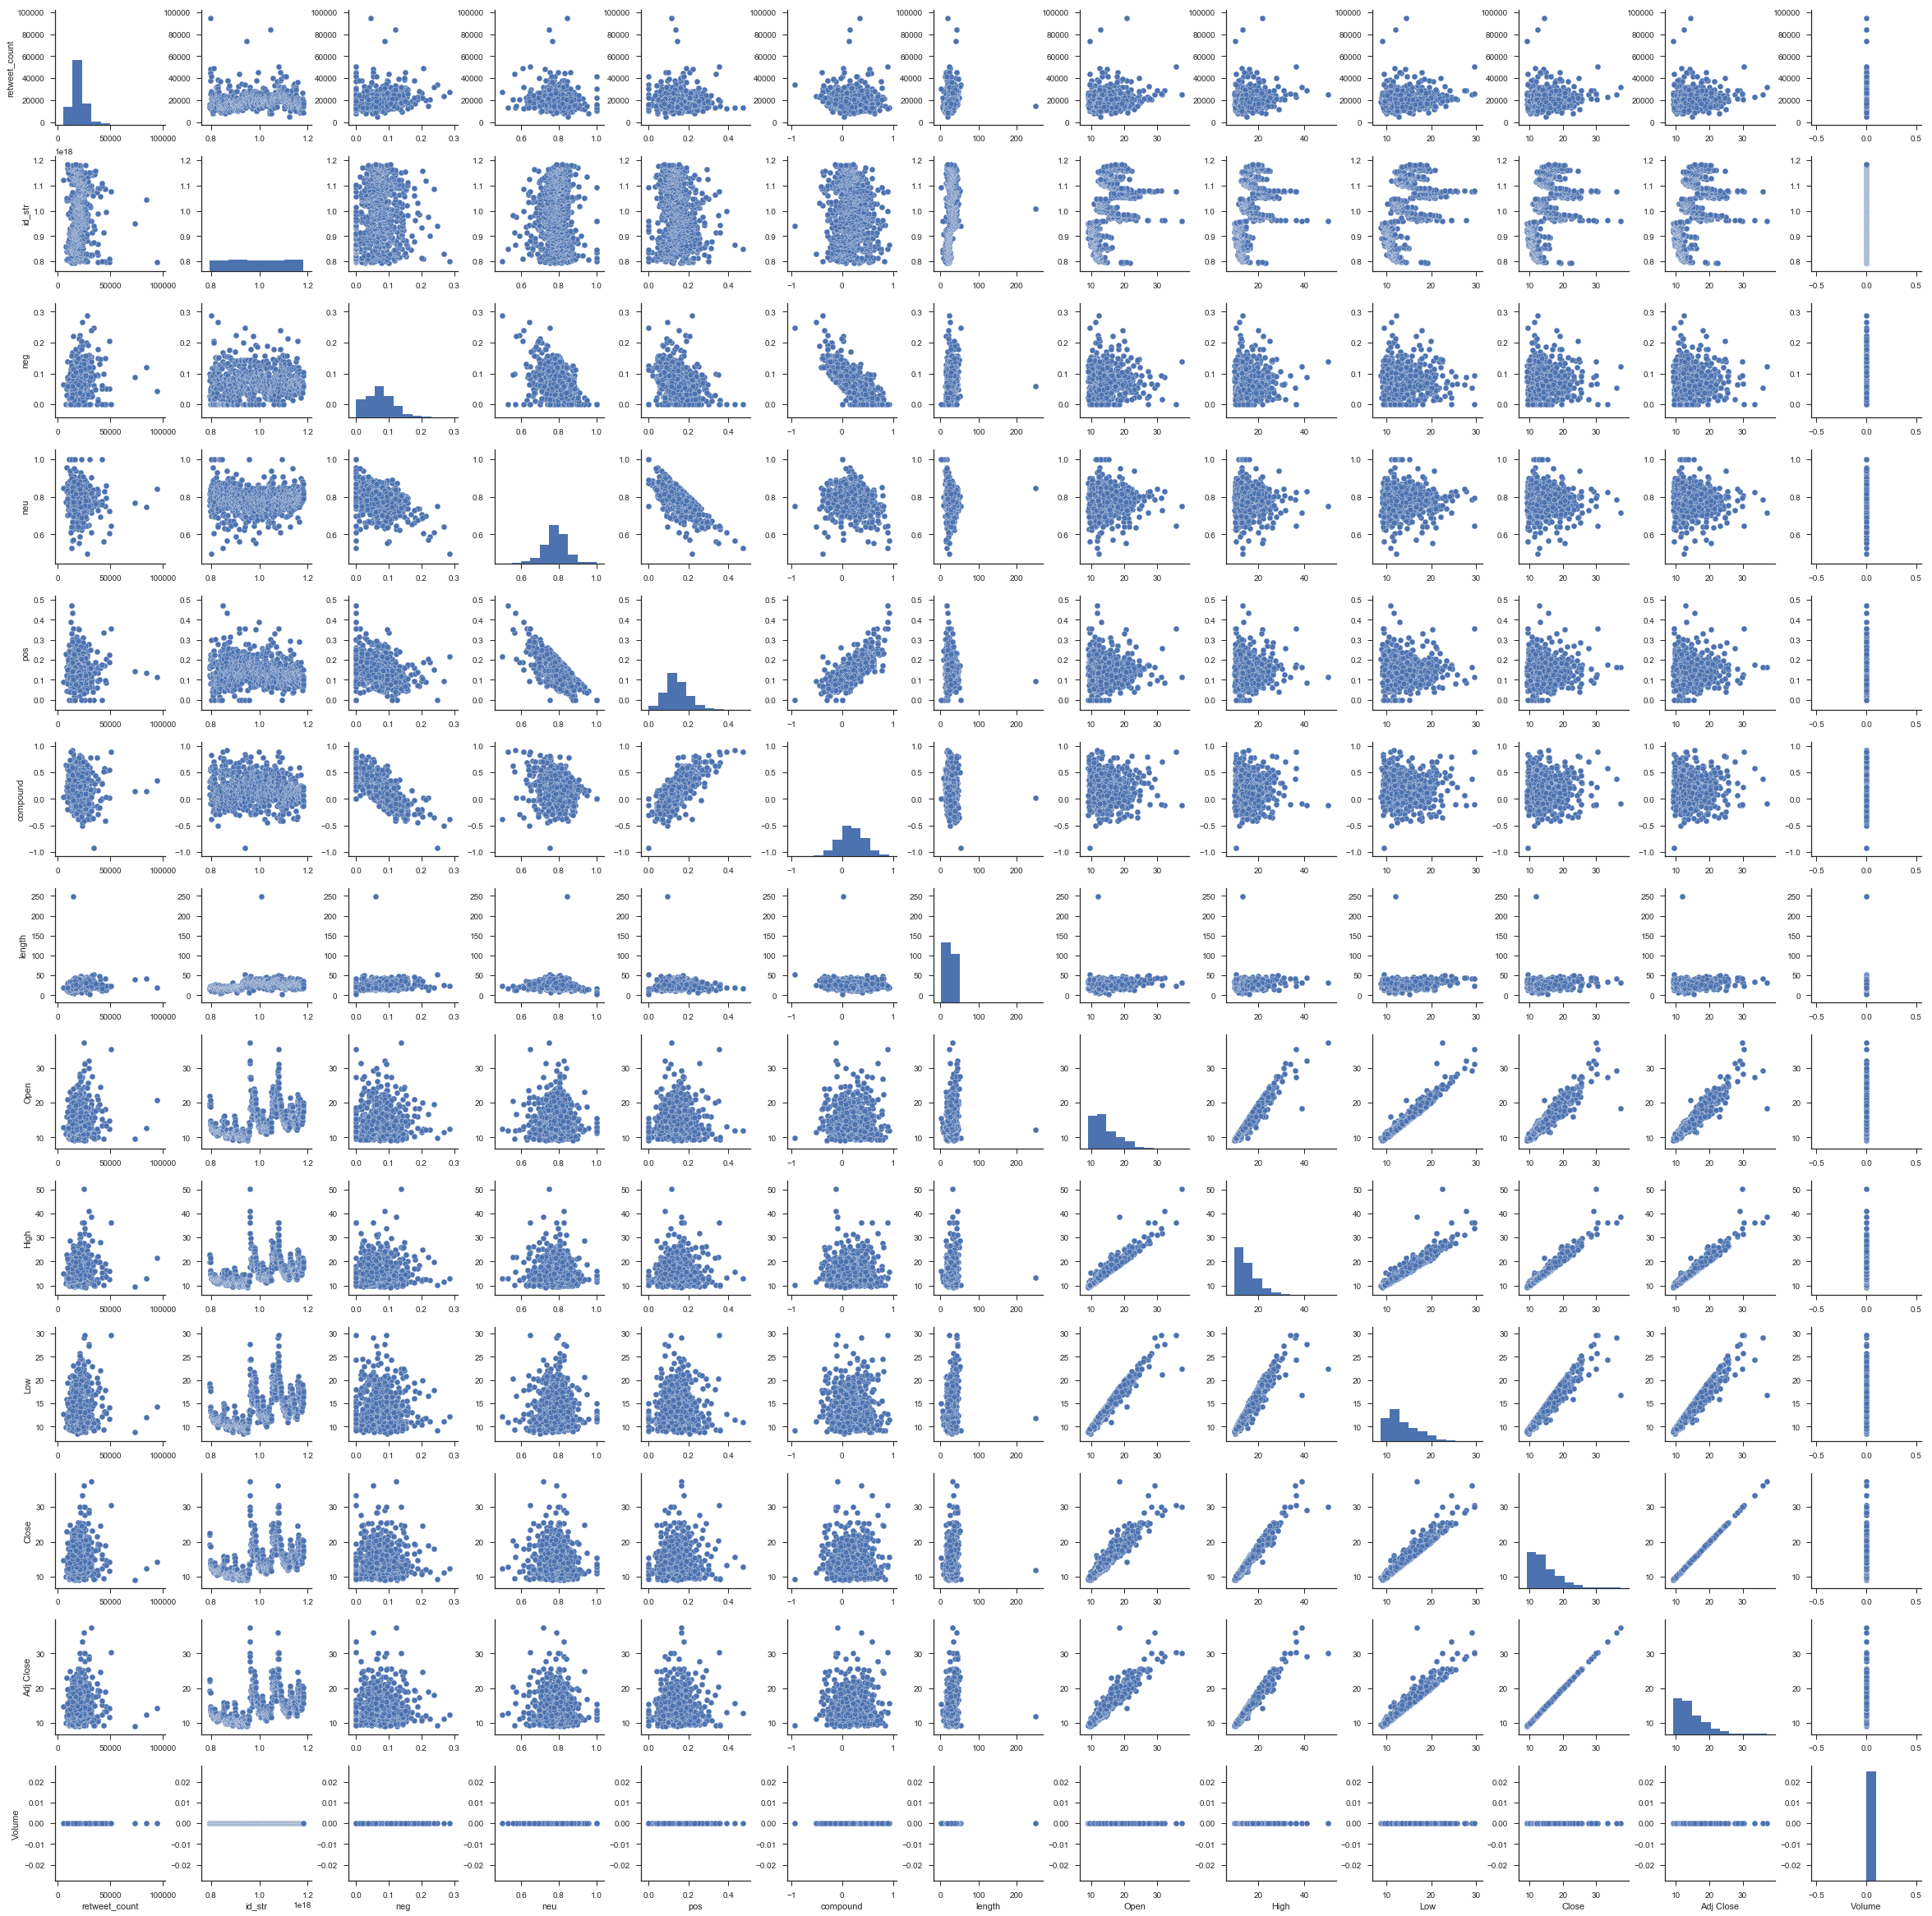

In [77]:
import datetime
sns.pairplot(datamerge[datamerge['Date']>datetime.date(2016, 11, 1)])